# Question 3

1. Given a start-point, a goal point, and two obstacles (defined in the provided code), implement the artificial potential field method to plan a collision-free trajectory from the starting point to the target point, while avoiding the two obstacles.
2. Visualize the planned trajectory, clearly showing the start point, target point, obstacles, and the path generated by your planner.

In [3]:
# import necessary python packages
import torch
import matplotlib.pyplot as plt

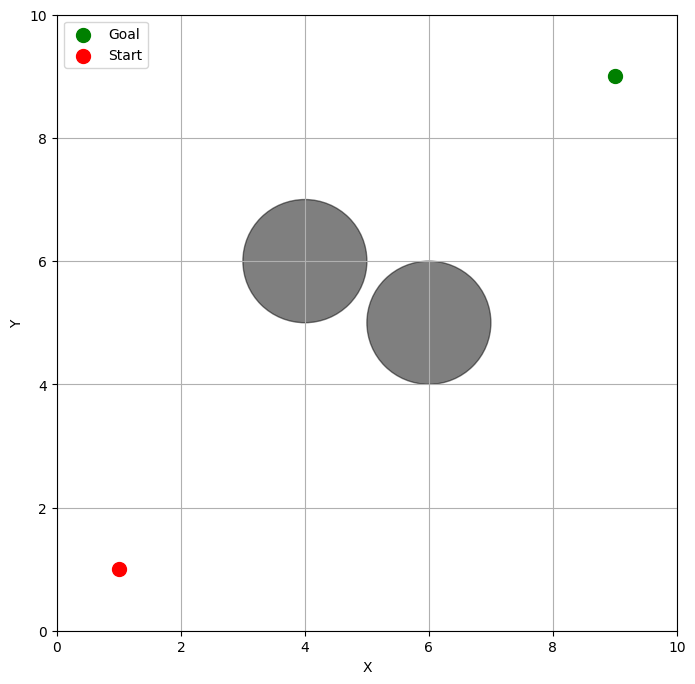

In [4]:
# Parameters for the environment
Goal = torch.tensor([9.0, 9.0], dtype=torch.float32)  # goal position
Start = torch.tensor([1.0, 1.0], dtype=torch.float32)  # start position

Obstacles = torch.tensor([[4.0, 6.0], [6.0, 5.0]], dtype=torch.float32)  # obstacle positions
Obstacle_radius = 1  # radius of the circular obstacles
Threshold = 4 # Threshold (i.e., rho_0), typically larger than Obstacle_radius

# Plotting the environment
plt.figure(figsize=(8, 8))
plt.scatter(Goal[0], Goal[1], color="green", label="Goal", s=100)
plt.scatter(Start[0], Start[1], color="red", label="Start", s=100)
for obs in Obstacles.numpy():
    circle = plt.Circle((obs[0], obs[1]), Obstacle_radius, color="black", alpha=0.5)
    plt.gca().add_artist(circle)
# Create a grid environment
grid_size = 10  # size of the grid
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [5]:
# parameters for attractive force and repulsive force
k_att = 1.0  # attractive constant
k_rep = 100.0  # repulsive constant

# Attractive potential field (towards goal)
def attractive_potential(x, goal):
    return 0.5 * k_att * torch.norm(x - goal) ** 2

# Repulsive potential field (away from obstacles)
def repulsive_potential(x, obstacles, threshold):
    rep_total = 0
    for obs in obstacles:
        dist = torch.norm(x - obs)
        if dist <= threshold:
            potential = 0.5 * k_rep * (1.0 / dist - 1.0 / threshold) ** 2
        else:
            potential = torch.tensor(0.0)  # zero if distance > threshold (means the robot is far from the obstacle)
        rep_total += potential
    return rep_total

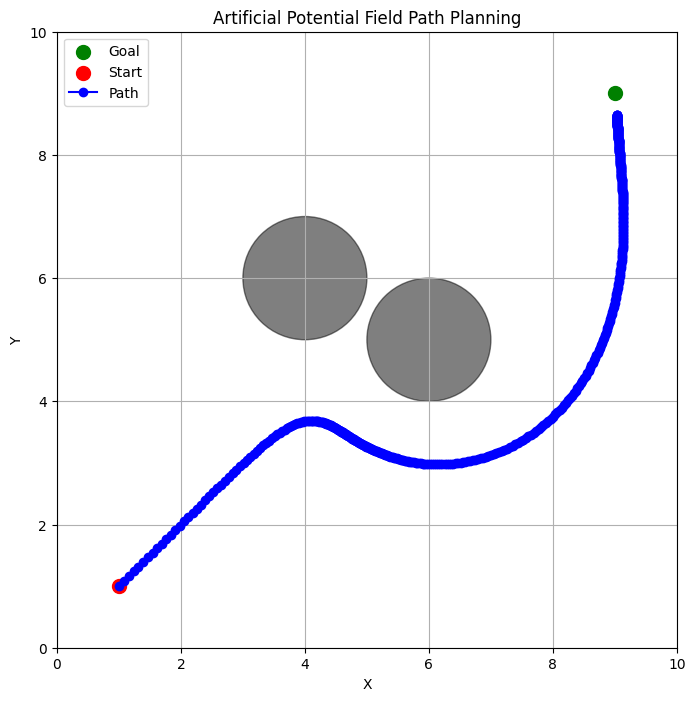

In [8]:
# TODO: implement your code here, where you can use the above two provided functions

def compute_gradient(x, goal, obstacles, threshold):
    """ Compute the gradient of the total potential function."""
    x.requires_grad_(True)
    U = attractive_potential(x, goal) + repulsive_potential(x, obstacles, threshold)
    U.backward()
    return x.grad

def plan_path(start, goal, obstacles, threshold, alpha=0.1, max_iters=500, tol=0.1):
    """ Implement gradient descent to move from start to goal while avoiding obstacles."""
    path = [start.clone()]
    x = start.clone().detach().requires_grad_(True)

    for _ in range(max_iters):
        grad = compute_gradient(x, goal, obstacles, threshold)
        x = (x - alpha * grad).detach()
        path.append(x.clone())

        if torch.norm(x - goal) < tol:
            break

    return torch.stack(path)

# Compute the trajectory
path = plan_path(Start, Goal, Obstacles, Threshold)

# Plot the planned trajectory
plt.figure(figsize=(8, 8))
plt.scatter(Goal[0], Goal[1], color="green", label="Goal", s=100)
plt.scatter(Start[0], Start[1], color="red", label="Start", s=100)
for obs in Obstacles.numpy():
    circle = plt.Circle((obs[0], obs[1]), Obstacle_radius, color="black", alpha=0.5)
    plt.gca().add_artist(circle)
plt.plot(path[:, 0], path[:, 1], marker='o', color='blue', label='Path')
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Artificial Potential Field Path Planning")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Discuss the results in your report

Experiment with different step size or learning rate for gradient descent, evaluate their performance. Then, analyze and discuss your findings in the report. You do not need to write code for this section—focus on interpreting and explaining the results in your discussion.

In [ ]:
# TODO: discuss your results in your report, no code required here.